# Synthethic generation of light curves

This notebooks illustrates the synthethic generation of light curves with mutis.

There are three methods implemented with mutis, with some variations:
- Generating signals by **sampling**. This signals have same statisical distribution.
- Gnerating signals by randomization of the Fourier transform from the **PSD** (Power Spectral Distribution). This signals have the same variability, and same mean and std.
- Generating signals by integration of an **stochastic** process (Orstein-Uhlenbeck process). Signals have similar shape.

In [1]:
# I'm doing a lot of changes to MUTIS while writting this, better reload automatically.
%load_ext autoreload
%autoreload

import numpy as np
import pandas as pd

import matplotlib as mplt
import matplotlib.pyplot as plt

from astropy.time import Time

import  mutis

## Load test data

In [2]:
data = {}

In [3]:
data['3mm'] = pd.read_csv('data/deg2-0235+164-3mm.dat', delim_whitespace=True, header=0, comment='!')
data['3mm'].mask(data['3mm'] == -1000, np.nan, inplace=True)

data['3mm']

,year,I,dI,pL,dpL,chi,dchi,pC,dpC,MJD
0,2007.3534,3.510,0.180,2.59,0.51,255.6,4.7,-0.58,0.22,54230.2015
1,2007.3671,3.920,0.200,2.61,0.47,245.2,5.0,-0.87,0.23,54234.8459
2,2007.6000,1.650,0.090,3.58,0.48,242.3,3.8,-0.35,0.22,54319.5631
3,2007.6356,1.380,0.070,2.49,0.54,268.5,4.5,0.31,0.22,54332.5276
4,2007.7041,0.690,0.040,3.27,0.54,250.7,4.1,-0.53,0.22,54358.4618
...,...,...,...,...,...,...,...,...,...,...
100,2020.4278,1.029,0.052,4.78,0.59,352.0,3.4,-3.80,0.42,59005.5950
101,2020.4542,2.216,0.111,4.38,0.58,347.6,3.2,0.33,0.31,59015.2792
102,2020.5063,2.226,0.111,1.21,0.47,320.0,12.2,1.00,0.31,59034.2958
103,2020.6671,2.234,0.112,7.18,0.67,311.8,1.8,1.35,0.33,59093.2050


In [4]:
data['gamma'] = pd.read_csv('data/0235_P8c_bin7_nov20.dat', delim_whitespace=True, header=0, comment='#')

data['gamma'].insert(0, 'jyear', value=Time(data['gamma']['MDJ'], format='mjd').jyear)


is_upper_limit = ~(data['gamma']['UpperLimit'] == 'Ignored')

I = np.where(~is_upper_limit, data['gamma']['Flux'], None)

dI = np.where(~is_upper_limit, data['gamma']['Flux_Err'], None)

I_UL = np.where(is_upper_limit, data['gamma']['Flux'], None)
dI_UL = np.where(is_upper_limit, data['gamma']['Flux_Err'], None) # non-sense

I2 = np.where(~is_upper_limit, I, I_UL)
dI2 = np.where(~is_upper_limit, dI, dI_UL)

data['gamma'].insert(1, 'I', value=I)
data['gamma'].insert(2, 'dI', value=dI)
data['gamma'].insert(3, 'I_UL', value=I_UL)
data['gamma'].insert(4, 'I2', value=I2)
data['gamma'].insert(4, 'dI2', value=dI2)

data['gamma'] = data['gamma'].sort_values(by='jyear').groupby('jyear', as_index=False).agg(lambda df: df.mean(axis=0))

data['gamma']

/home/users/dreg/jescudero/.conda/envs/mixd/lib/python3.7/site-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,jyear,I,dI,I_UL,dI2,I2,N,MDJ,Flux,Flux_Err,alpha,beta,Eb,TS_VALUE,Norm,Norm_Err,T_START,T_STOP,NPRED
0,2008.605065,1.894027e-07,3.326300e-08,NaN,3.326300e-08,1.894027e-07,1.0,54687.5000,1.894027e-07,3.326300e-08,2.0803,0.095422,887.56,120.40,2.714675e-11,4.769000e-12,239673599.0,240278399.0,116.30
1,2008.624230,5.572932e-07,4.754800e-08,NaN,4.754800e-08,5.572932e-07,2.0,54694.5000,5.572932e-07,4.754800e-08,2.0803,0.095422,887.56,675.50,7.987585e-11,6.817000e-12,240278399.0,240883199.0,334.00
2,2008.643395,5.439230e-07,5.684800e-08,NaN,5.684800e-08,5.439230e-07,3.0,54701.5000,5.439230e-07,5.684800e-08,2.0803,0.095422,887.56,500.00,7.795953e-11,8.150300e-12,240883199.0,241487999.0,253.10
3,2008.662560,6.763391e-07,6.980500e-08,NaN,6.980500e-08,6.763391e-07,4.0,54708.5000,6.763391e-07,6.980500e-08,2.0803,0.095422,887.56,623.00,9.693850e-11,1.000800e-11,241487999.0,242092799.0,260.40
4,2008.681725,9.020173e-07,7.435100e-08,NaN,7.435100e-08,9.020173e-07,5.0,54715.5000,9.020173e-07,7.435100e-08,2.0803,0.095422,887.56,994.10,1.292846e-10,1.066000e-11,242092799.0,242697599.0,362.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,2020.763861,1.119233e-07,5.747500e-08,NaN,5.747500e-08,1.119233e-07,15.0,59128.5001,1.119233e-07,5.747500e-08,2.0803,0.095422,887.56,14.03,1.604177e-11,8.240300e-12,623376005.0,623980805.0,23.45
633,2020.783026,9.138770e-08,3.188800e-08,NaN,3.188800e-08,9.138770e-08,16.0,59135.5001,9.138770e-08,3.188800e-08,2.0803,0.095422,887.56,21.53,1.309844e-11,4.571800e-12,623980805.0,624585605.0,37.80
634,2020.802191,NaN,NaN,2.843496e-08,1.657600e-08,2.843496e-08,17.0,59142.5001,2.843496e-08,1.657600e-08,2.0803,0.095422,887.56,7.04,4.075533e-12,2.376500e-12,624585605.0,625190405.0,12.19
635,2020.821356,4.770228e-08,2.429000e-08,NaN,2.429000e-08,4.770228e-08,18.0,59149.5001,4.770228e-08,2.429000e-08,2.0803,0.095422,887.56,11.23,6.837084e-12,3.482500e-12,625190405.0,625795205.0,20.28


## 3mm

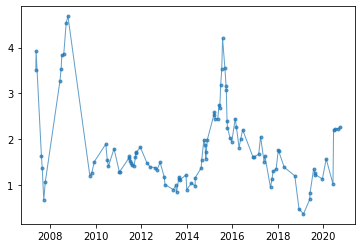

In [5]:
import mutis
sig3mm = mutis.Signal(data['3mm']['year'], data['3mm']['I'], data['3mm']['dI'])
sig3mm.plot()

### `lc_gen_samp`

We first check the generation with simple sampling of the signals. We see that the shape is not similar.

Original vs Synthethic:
mean: 1.8457238095238098 / 1.8058857142857143
std: 0.8846472904388085 / 0.8411705145556536


{'ax1': <AxesSubplot:title={'center':'light curves'}>,
 'ax2': <AxesSubplot:title={'center':'pdf'}>,
 'ax3': <AxesSubplot:title={'center':'PSD'}>}

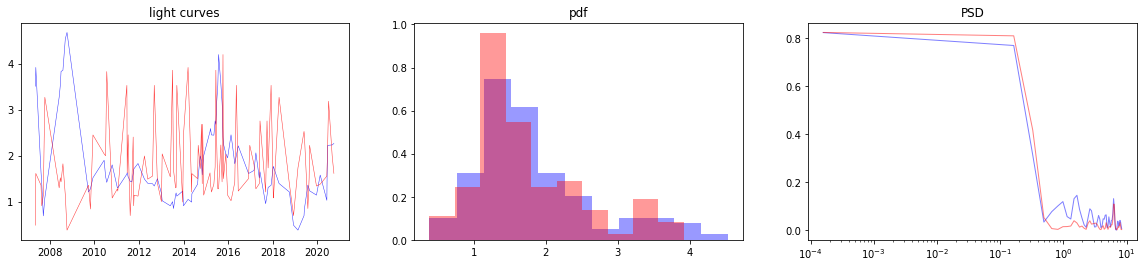

In [6]:
sig3mm.check_gen('lc_gen_samp')

### `lc_gen_psd_*`

Original vs Synthethic:
mean: 1.8457238095238098 / 1.84572380952381
std: 0.8846472904388085 / 0.8846472904388085


/home/users/dreg/jescudero/.conda/envs/mixd/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 105, using nperseg = 105
  .format(nperseg, input_length))


{'ax1': <AxesSubplot:title={'center':'light curves'}>,
 'ax2': <AxesSubplot:title={'center':'pdf'}>,
 'ax3': <AxesSubplot:title={'center':'PSD'}>}

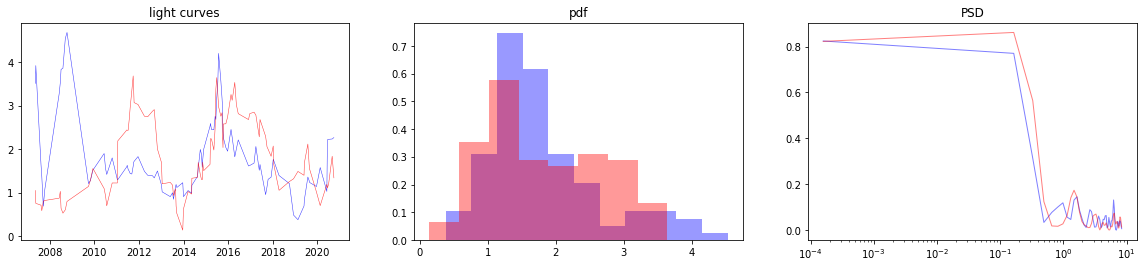

In [7]:
sig3mm.check_gen('lc_gen_psd_fft')

We see that the signals have similar shape, and almost identical variability. The statistical distribution is not exactly the same.

We now check using the non-uniform fourier transform. The generation with the FFT was not technically correct since the signal was not evenly sampled in time.

Original vs Synthethic:
mean: 1.8457238095238098 / 1.84572380952381
std: 0.8846472904388085 / 0.8846472904388085


{'ax1': <AxesSubplot:title={'center':'light curves'}>,
 'ax2': <AxesSubplot:title={'center':'pdf'}>,
 'ax3': <AxesSubplot:title={'center':'PSD'}>}

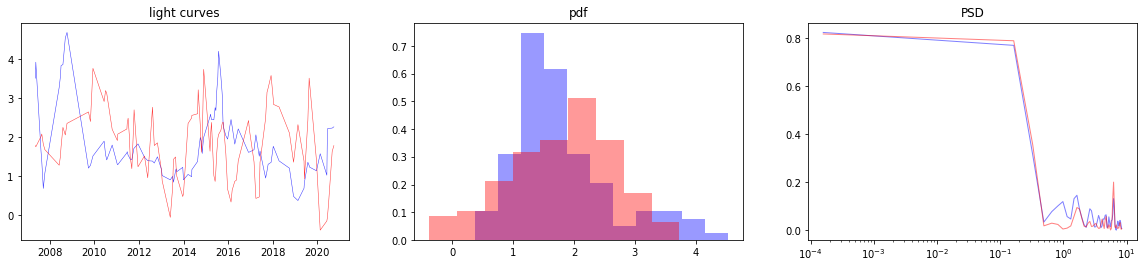

In [8]:
sig3mm.check_gen('lc_gen_psd_nft')

Still another method can be used to reconstruct the signal; the Lomb-Scargle method to compute the PSD.

Original vs Synthethic:
mean: 1.8457238095238098 / 1.84572380952381
std: 0.8846472904388085 / 0.884371215813492


{'ax1': <AxesSubplot:title={'center':'light curves'}>,
 'ax2': <AxesSubplot:title={'center':'pdf'}>,
 'ax3': <AxesSubplot:title={'center':'PSD'}>}

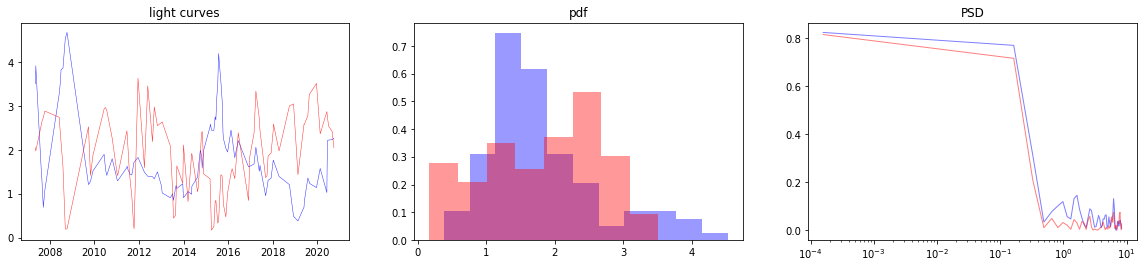

In [9]:
sig3mm.check_gen('lc_gen_psd_lombscargle')

**From these results, we see that the shape for 3mm is better reproduced with `lc_gen_psd_fft`.**

### `lc_gen_OU`

To use the stochastic OU method, first we need to find suitable parameters:

/home/users/dreg/jescudero/workspace/MUTIS/mutis/signal.py:252: RuntimeWarning: invalid value encountered in double_scalars
  / xx ** (ll + 2)
/home/users/dreg/jescudero/workspace/MUTIS/mutis/signal.py:252: RuntimeWarning: divide by zero encountered in true_divide
  / xx ** (ll + 2)
/home/users/dreg/jescudero/workspace/MUTIS/mutis/signal.py:252: RuntimeWarning: invalid value encountered in true_divide
  / xx ** (ll + 2)


{'sigma_est': 1.012101310263405,
 'curve_fit': (array([5.30727198, 1.72220577]),
  array([0.60240551, 0.07193591])),
 'MLE_fit': (3.8393639402126185, 1.8832558031434945),
 'th_est1': 1.9664244258714851,
 'th_est2': 2.718249536891015}

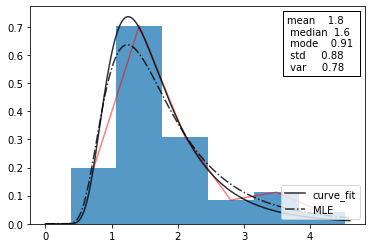

In [10]:
sig3mm.OU_fit()

Original vs Synthethic:
mean: 1.8457238095238098 / 1.8980178750130006
std: 0.8846472904388085 / 1.2446789283420958


{'ax1': <AxesSubplot:title={'center':'light curves'}>,
 'ax2': <AxesSubplot:title={'center':'pdf'}>,
 'ax3': <AxesSubplot:title={'center':'PSD'}>}

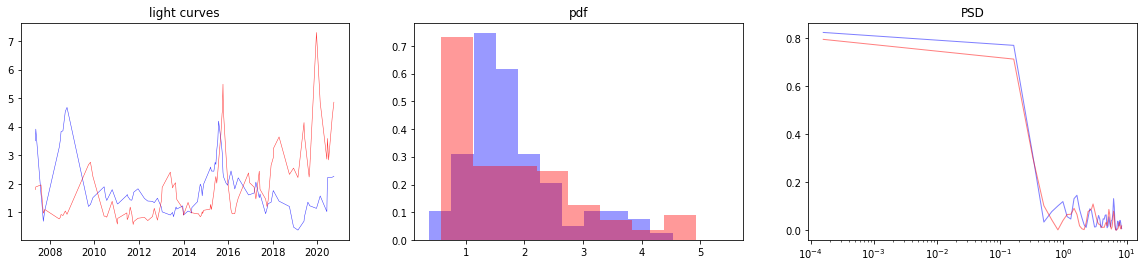

In [11]:
sig3mm.check_gen('lc_gen_ou', fgen_params={'mu':1.8, 'sigma':1.01, 'theta':1.96})

In [12]:
sig3mm.OU_mu, sig3mm.OU_sigma, sig3mm.OU_theta = 1.8, 1.01, 1.96

We see that these value produce synthethic light curves that have similar shape, distribution and variability.

## Gamma

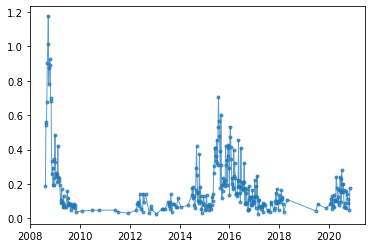

In [13]:
sigGamma = mutis.Signal(data['gamma']['jyear'][np.isfinite(data['gamma']['I'])], 1e6*data['gamma']['I'][np.isfinite(data['gamma']['I'])], 1e6*data['gamma']['dI'][np.isfinite(data['gamma']['I'])])
sigGamma.plot()

### `lc_gen_psd_*`

Original vs Synthethic:
mean: 0.18403198521885522 / 0.18403198521885522
std: 0.17679375234690745 / 0.17679375234690742


{'ax1': <AxesSubplot:title={'center':'light curves'}>,
 'ax2': <AxesSubplot:title={'center':'pdf'}>,
 'ax3': <AxesSubplot:title={'center':'PSD'}>}

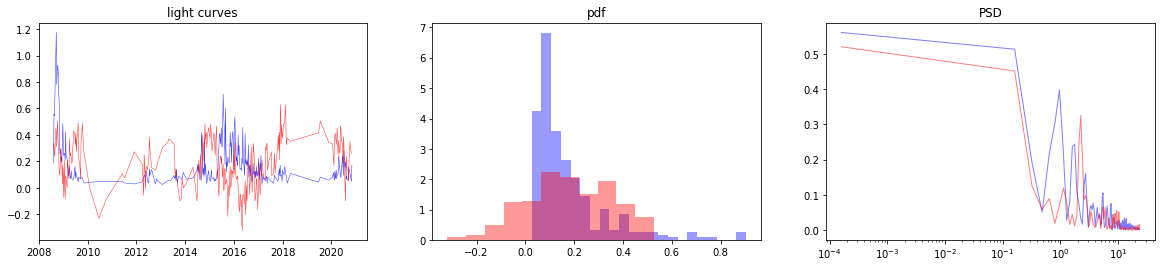

In [14]:
sigGamma.check_gen('lc_gen_psd_fft')

Here we see that `lc_gen_psd_fft` does not generate signals with similar shapes, specially during flares.

Original vs Synthethic:
mean: 0.18403198521885522 / 0.1840319852188552
std: 0.17679375234690745 / 0.17679375234690742


{'ax1': <AxesSubplot:title={'center':'light curves'}>,
 'ax2': <AxesSubplot:title={'center':'pdf'}>,
 'ax3': <AxesSubplot:title={'center':'PSD'}>}

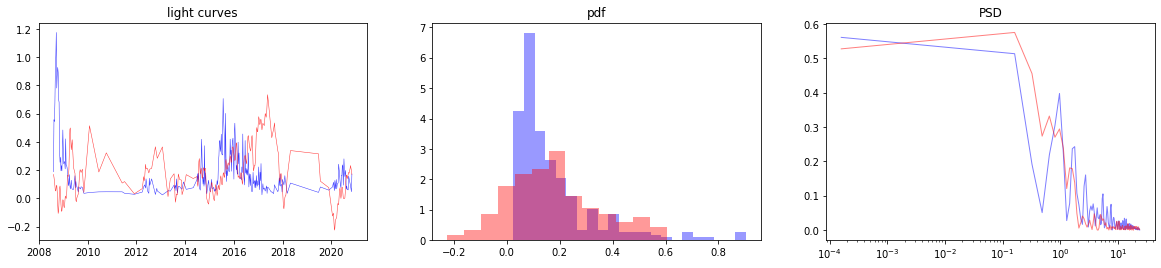

In [15]:
sigGamma.check_gen('lc_gen_psd_nft')

### `lc_gen_OU`

/home/users/dreg/jescudero/workspace/MUTIS/mutis/signal.py:252: RuntimeWarning: invalid value encountered in double_scalars
  / xx ** (ll + 2)
/home/users/dreg/jescudero/workspace/MUTIS/mutis/signal.py:252: RuntimeWarning: divide by zero encountered in true_divide
  / xx ** (ll + 2)
/home/users/dreg/jescudero/workspace/MUTIS/mutis/signal.py:252: RuntimeWarning: invalid value encountered in true_divide
  / xx ** (ll + 2)


{'sigma_est': 4.931712809163815,
 'curve_fit': (array([0.62683341, 0.29134772]),
  array([0.09447965, 0.02474926])),
 'MLE_fit': (1.0442602516075814, 0.20054674294478603),
 'th_est1': 12.699139915774477,
 'th_est2': 7.622855623391072}

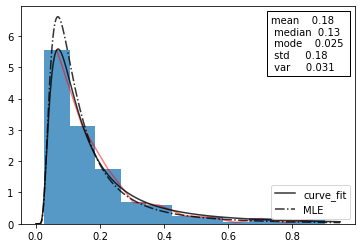

In [16]:
sigGamma.OU_fit()

Original vs Synthethic:
mean: 0.18403198521885522 / 0.1578107117868549
std: 0.17679375234690745 / 0.21730070902250379


{'ax1': <AxesSubplot:title={'center':'light curves'}>,
 'ax2': <AxesSubplot:title={'center':'pdf'}>,
 'ax3': <AxesSubplot:title={'center':'PSD'}>}

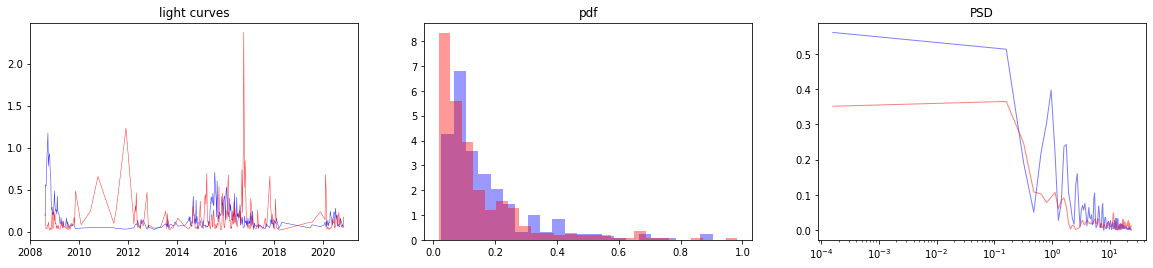

In [17]:
sigGamma.check_gen('lc_gen_ou',
                   fgen_params={'mu':0.21, 'sigma':4.9, 'theta':7.6, 
                               })#'scale':np.std(sigGamma.values), 'loc':np.mean(sigGamma.values)})

## Set and generate synthethics

Now that we have checked which generation methods are the best, we set them and generate the synthethic light curves.

In [18]:
%%time
sig3mm.fgen = 'lc_gen_psd_fft'
sig3mm.gen_synth(400)

CPU times: user 131 ms, sys: 1 ms, total: 132 ms
Wall time: 131 ms


/home/users/dreg/jescudero/.conda/envs/mixd/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 105, using nperseg = 105
  .format(nperseg, input_length))


In [19]:
%%time
sigGamma.fgen = 'lc_gen_ou'
sigGamma.OU_mu, sigGamma.OU_sigma, sigGamma.OU_theta = 0.2, 4.9, 7
sigGamma.gen_synth(400)

CPU times: user 834 ms, sys: 1e+03 µs, total: 835 ms
Wall time: 834 ms


## Correlation

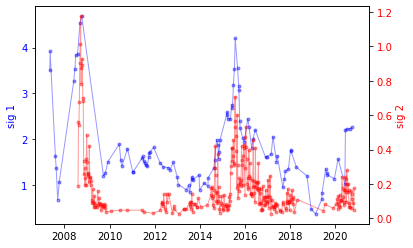

In [20]:
corr3mmGamma = mutis.Correlation(sig3mm, sigGamma, 'welsh')
corr3mmGamma.plot_signals()

(-0.547945205479452, 0.547945205479452)

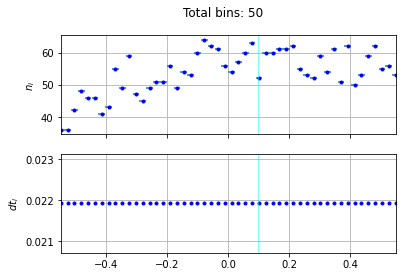

In [21]:
corr3mmGamma.gen_times(ftimes='uniform', tmin=-200/365, tmax=+200/365, n=50, nbinsmin=11)
corr3mmGamma.plot_times()
plt.xlim([-200/365,+200/365])

In [22]:
corr3mmGamma.samples = 400

In [23]:
%%time
corr3mmGamma.gen_corr(uncert=False)

CPU times: user 1.36 s, sys: 1e+03 µs, total: 1.36 s
Wall time: 1.35 s


(-0.547945205479452, 0.547945205479452)

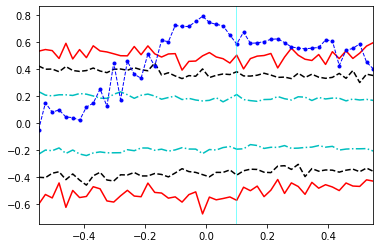

In [24]:
corr3mmGamma.plot_corr(uncert=False)
plt.xlim([-200/365,+200/365])